Veri Setinin İlk 5 Satırı:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Veri Setinin Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

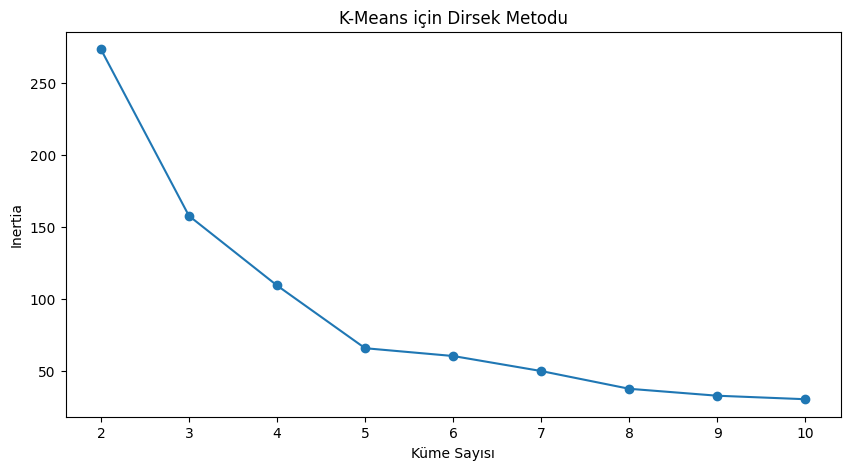

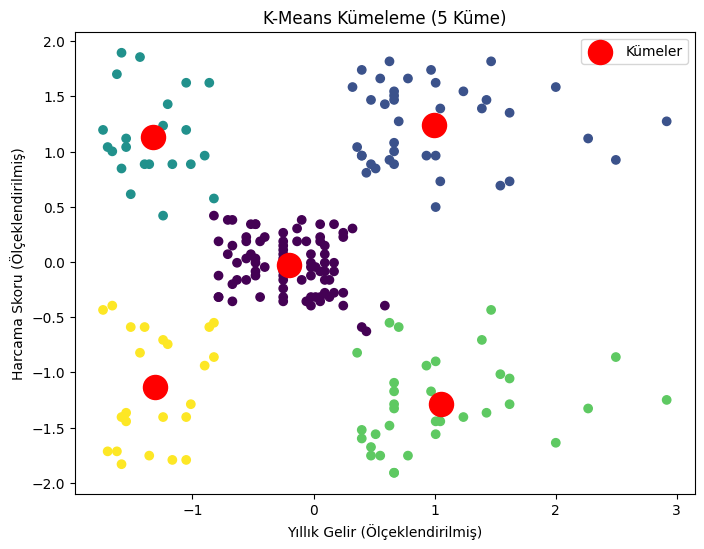

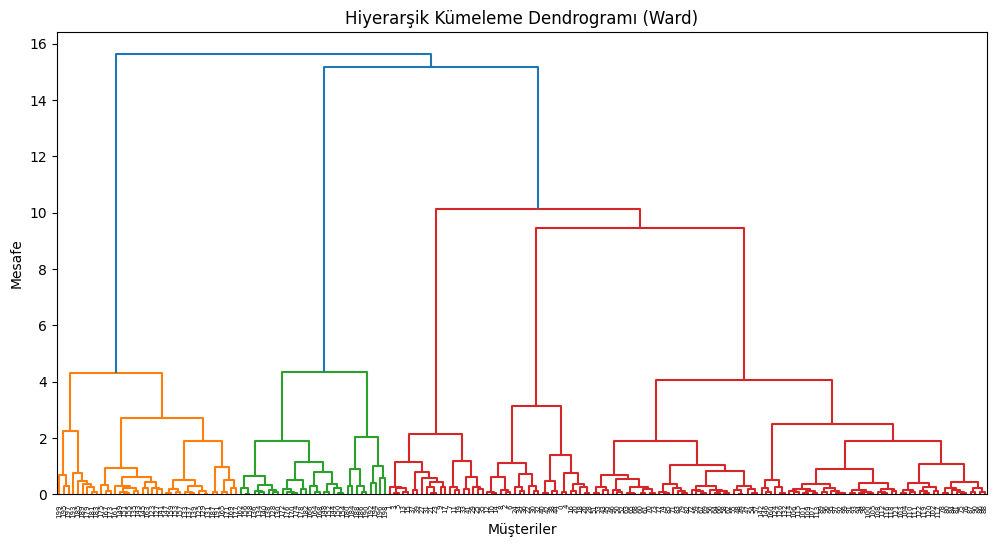

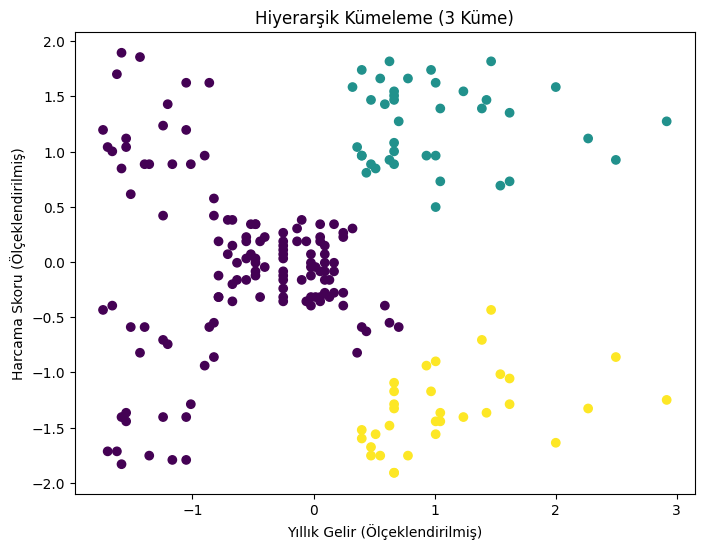

NameError: name 'NearestNeighbors' is not defined

In [ ]:
#Dört kümeleme Algoritması ile Karma Örnek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Veri Setini Yükleme
df = pd.read_csv('Mall_Customers.csv')

# İlk birkaç satırı ve temel bilgileri görüntüleme
print("Veri Setinin İlk 5 Satırı:")
print(df.head())
print("\nVeri Setinin Bilgileri:")
print(df.info())
print("\nVeri Setinin İstatistiksel Özeti:")
print(df.describe())

# Cinsiyet sütununu sayısal hale getirme (basit bir örnek)
df['Gender'] = df['Genre'].map({'Male': 0, 'Female': 1})

# Kullanılacak özellikleri seçme (basit görselleştirme için 2 boyut)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# 2. Veri Ön İşleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Algoritmaları Uygulama ve Görselleştirme
# a) K-Means
inertia = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('K-Means için Dirsek Metodu')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia')
plt.show()

n_clusters_kmeans = 5  # Dirsek metoduna göre seçilen küme sayısı
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Kümeler')
plt.title(f'K-Means Kümeleme ({n_clusters_kmeans} Küme)')
plt.xlabel('Yıllık Gelir (Ölçeklendirilmiş)')
plt.ylabel('Harcama Skoru (Ölçeklendirilmiş)')
plt.legend()
plt.show()


# b) Hiyerarşik Kümeleme
linked = linkage(X_scaled, 'ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top')
plt.title('Hiyerarşik Kümeleme Dendrogramı (Ward)')
plt.xlabel('Müşteriler')
plt.ylabel('Mesafe')
plt.show()

n_clusters_hierarchical = 3  # Dendrogramdan seçilen küme sayısı
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title(f'Hiyerarşik Kümeleme ({n_clusters_hierarchical} Küme)')
plt.xlabel('Yıllık Gelir (Ölçeklendirilmiş)')
plt.ylabel('Harcama Skoru (Ölçeklendirilmiş)')
plt.show()

# c) DBSCAN
# Parametre seçimi için k-mesafe grafiği (örnek bir yaklaşım)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 4]
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-Mesafe Grafiği (k=4)')
plt.xlabel('Veri Noktası (Sıralı)')
plt.ylabel('4. En Yakın Komşu Mesafesi')
plt.grid(True)
plt.show()

eps_dbscan = 0.5  # K-mesafe grafiğine göre tahmini eps değeri
min_samples_dbscan = 5
dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (dbscan_labels == k)
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=8)
plt.title(f'DBSCAN Kümeleme (eps={eps_dbscan}, minPts={min_samples_dbscan})')
plt.xlabel('Yıllık Gelir (Ölçeklendirilmiş)')
plt.ylabel('Harcama Skoru (Ölçeklendirilmiş)')
plt.show()

# d) Gaussian Mixture Model (GMM)
n_components_gmm = 3  # Deneme amaçlı küme sayısı
gmm = GaussianMixture(n_components=n_components_gmm, random_state=42, n_init=10)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, n_components_gmm)]
for i in range(n_components_gmm):
    data = X_scaled[gmm_labels == i]
    plt.scatter(data[:, 0], data[:, 1], marker='o', color=colors[i], label=f'Küme {i}')
plt.title(f'Gaussian Mixture Model ({n_components_gmm} Bileşen)')
plt.xlabel('Yıllık Gelir (Ölçeklendirilmiş)')
plt.ylabel('Harcama Skoru (Ölçeklendirilmiş)')
plt.legend()
plt.show()